## Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset.

In [2]:
data=pd.read_excel(r"C:\Users\HP\Downloads\iris (2).xls")

In [3]:
data.head(6)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


## Data Analysis

In [4]:
data.shape                    #Dataset has 150 rows and 5 columns.

(150, 5)

In [5]:
data.describe()              #Checking statistical summary.

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.dtypes                 #Dataset has 4 numerical features and 1 categorical feature.

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

### Checking for null values.

In [8]:
data.isnull().sum()               #So columns 'Sepal length','Sepal width','Petal length' has null values.

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

##### Plotting the distribution of numerical features.

In [9]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']

In [10]:
numerical_features

['SL', 'SW', 'PL', 'PW']

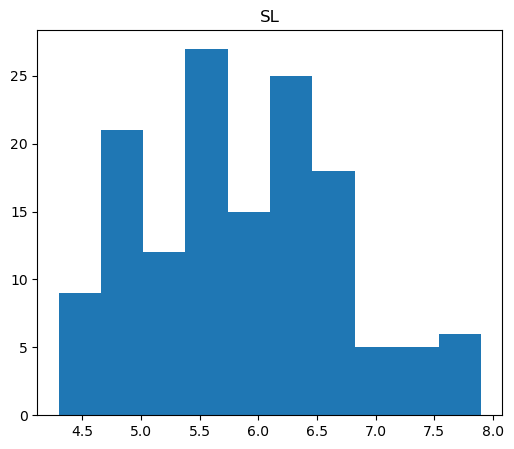

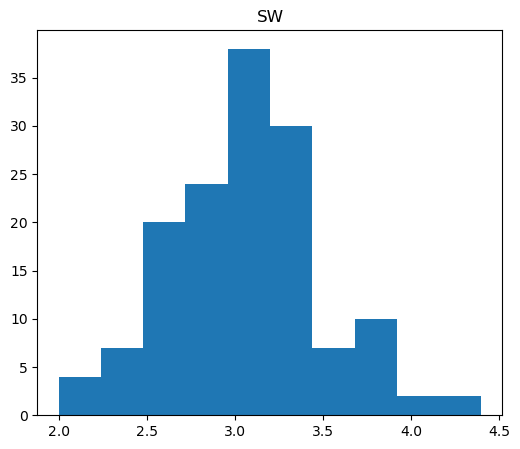

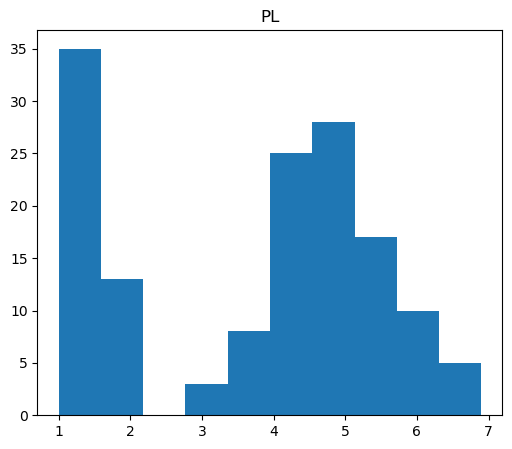

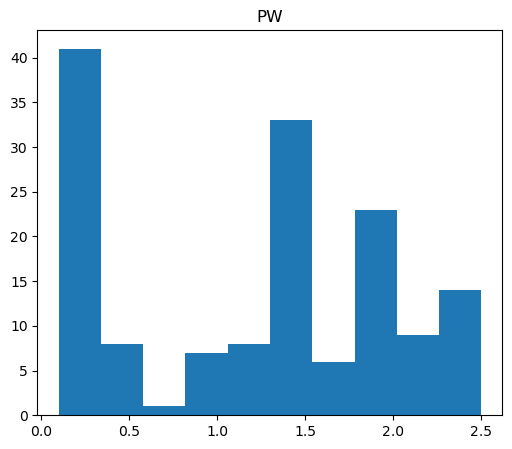

In [11]:
for feature in numerical_features:
    
    plt.figure(figsize=(6,5))
    plt.hist(data[feature])
    plt.title(feature)


INFERENCE:"SL","PL","Pw" has skewed distribution.And "SW" has normal distribution.
So null values of "SL",and "PL" can filled with median values.



In [13]:
#checking the cardinality of categorical columns.

data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

## Data Preprocessing

###### Filling the null values.

In [14]:
#SW has normal distribution so it is filling with mean

In [15]:
data['SW']=data['SW'].fillna(data['SW'].mean())
data.isnull().sum()
print('Number of null values in SW column: ', data['SW'].isnull().sum())

Number of null values in SW column:  0


In [16]:
#SL and Pl has skewed distribution so it is filling with median values.

In [17]:
data['SL']=data['SL'].fillna(data['SL'].median())
data.isnull().sum()
print('Number of null values in SL column: ', data['SL'].isnull().sum())


data['PL']=data['PL'].fillna(data['PL'].median())
data.isnull().sum()
print('Number of null values in PL column: ', data['PL'].isnull().sum())

Number of null values in SL column:  0
Number of null values in PL column:  0


INFERENCE:Missing values are filled.

### Checking for Outliers

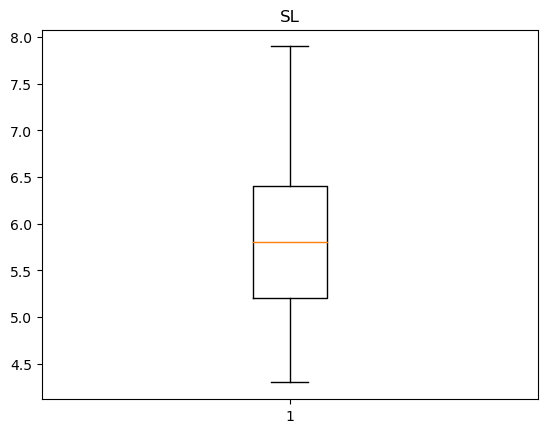

<Figure size 600x500 with 0 Axes>

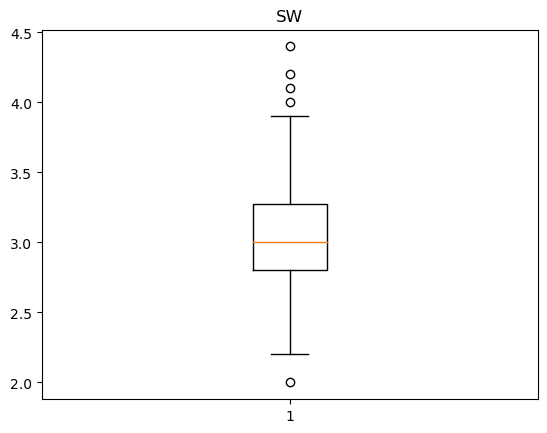

<Figure size 600x500 with 0 Axes>

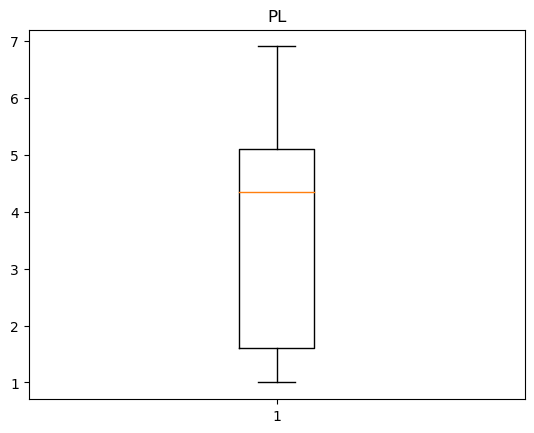

<Figure size 600x500 with 0 Axes>

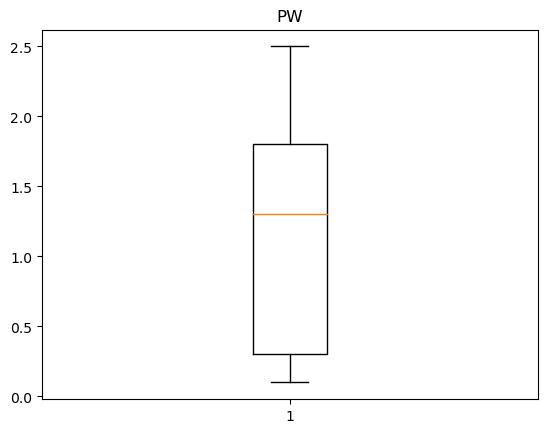

<Figure size 600x500 with 0 Axes>

In [20]:
for feature in numerical_features:
    
    plt.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(6,5))
    plt.show()

INFERENCE:It is shown that SW has outliers.

#### Dealing with outliers in SW.

In [22]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)


2.8
3.0
3.25


In [23]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR
print("IQR is : ",IQR)
print("Lower Limit is :",low_lim)
print("Upper limit is: ",up_lim)

IQR is :  0.4500000000000002
Lower Limit is : 2.1249999999999996
Upper limit is:  3.9250000000000003


In [39]:
#Finding the outlier values.

data[(data['SW'] > up_lim) ^ (data['SW'] < low_lim)]


,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


INFERENCE:14,15,32,33,60 are the index values of outliers.

In [41]:
#Dropping the outliers.

data=data.drop([14, 15, 32, 33,60])

In [43]:
data.shape                  #Outliers were removed.

(145, 5)

### Checking the Correlation.

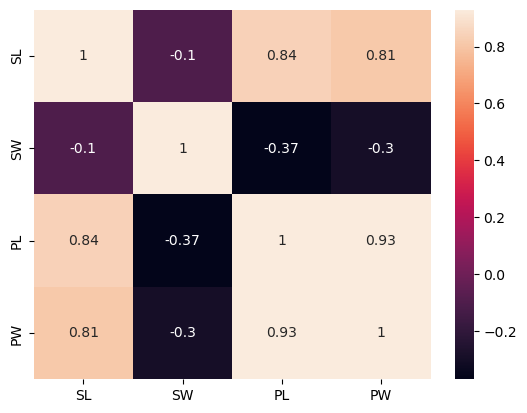

In [49]:
corrmatrix=data.corr()

sns.heatmap(corrmatrix,vmax=0.93,vmin=-0.37,annot=True)
plt.show()

INFERENCE:PL and PW (0.93)has highest positive correlation values and PL and SW (-0.37) has highest negative correlation values.

### Label Encoding the classification column.

In [56]:
#importing the library
from sklearn.preprocessing import LabelEncoder

#creating an instance
le=LabelEncoder()

#encoding
data['Classification']=le.fit_transform(data['Classification'])

In [60]:
data.head(6)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


INFERENCE:Classification is encoded in to Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2 

## Finding out which classification model gives the best result.

In [62]:
#splitting the dataset into target and features
y=data['Classification']
x=data.drop('Classification',axis=1)

In [63]:
#Splitting the dataset into training and testing data.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Creation.

## 1.Logistic Regression

In [65]:
#importing the libraries.
from sklearn.linear_model import LogisticRegression

#creating an instance.
lr=LogisticRegression()

#Fitting the model
lr.fit(x_train, y_train)

#Predicting
y_pred_lr = lr.predict(x_test)

#### Evaluation of the model created

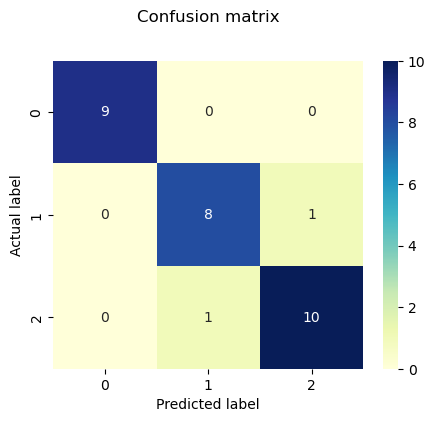

In [75]:
#importing the library.
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score,f1_score

#Confusion matrix
cnf_matrix =confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [69]:
print('The accuracy of logistic regression model is',accuracy_score(y_test,y_pred_lr))
print("Precision :",precision_score(y_test,y_pred_lr,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_lr,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_lr,average = 'weighted'))

The accuracy of logistic regression is 0.9310344827586207
Precision : 0.9310344827586207
Recall : 0.9310344827586207
F1 Score : 0.9310344827586207


## 2.KNN Classification 

In [82]:
#Importing the library
from sklearn.neighbors import KNeighborsClassifier

#Finding the best K value for kNN 
metric_k=[]  
neighbors=range(1,20)  

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(x_train,y_train)
    pred_kNN=classifier.predict(x_test)
    acc=accuracy_score(y_test,pred_kNN) 
    metric_k.append(acc) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

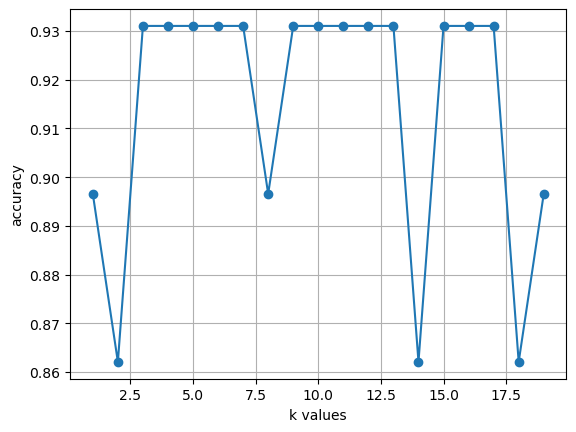

In [83]:
#ploting to find the  k value that gives best accuracy 

plt.plot(neighbors,metric_k,'o-')  
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid() 

In [85]:
#There are many values which can be considere as k value as many gives same accuracy
#Lets take k as 15 here

#Creating an instance
knn=KNeighborsClassifier(n_neighbors=15)
#Fit the model
knn.fit(x_train,y_train)

#Prediction
y_pred_knn=knn.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Evaluation of model created.

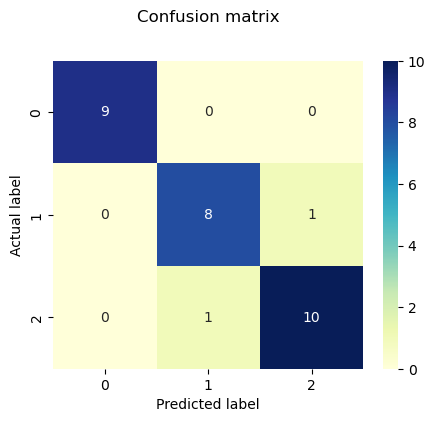

In [86]:
#Confusion matrix
cnf_matrix =confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [87]:
print('The accuracy of KNN model is',accuracy_score(y_test,y_pred_knn))
print("Precision :",precision_score(y_test,y_pred_knn,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_knn,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_knn,average = 'weighted'))

The accuracy of KNN model is 0.9310344827586207
Precision : 0.9310344827586207
Recall : 0.9310344827586207
F1 Score : 0.9310344827586207


# 3.Support Vector Machine Model of Classification (SVC)

In [90]:
#importing the necessary library
from sklearn.svm import SVC

### a.SVC model with linear as kernel.

In [92]:
#Creating an instance
svm_linear=SVC(kernel='linear')

#Fitting the model
svm_linear.fit(x_train,y_train)

#Predicting
y_pred_svml=svm_linear.predict(x_test)

### Evaluation of model created.

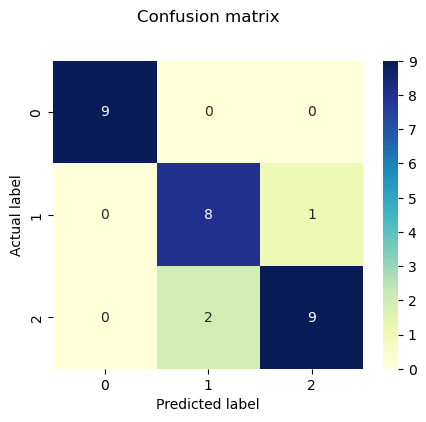

In [93]:
#Confusion matrix
cnf_matrix =confusion_matrix(y_test, y_pred_svml)
plt.figure(figsize=(5,4))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [94]:
print('The accuracy of SVC model using linear as kernel is',accuracy_score(y_test,y_pred_svml))
print("Precision :",precision_score(y_test,y_pred_svml,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_svml,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_svml,average = 'weighted'))

The accuracy of SVC model using linear as kernel is 0.896551724137931
Precision : 0.9
Recall : 0.896551724137931
F1 Score : 0.8968109929997409


## b.SVC Model with Kernal as RBF(Radial Basis Function)

In [97]:
#creating an instance
svm_rbf=SVC(kernel='rbf')

#Fitting the model
svm_rbf.fit(x_train,y_train)

#Prediction
y_pred_svmr=svm_rbf.predict(x_test)

### Evaluation of model created.

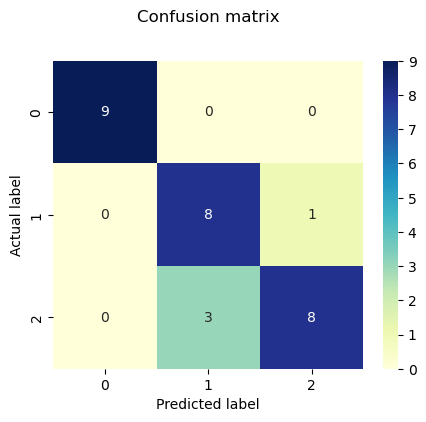

In [98]:
#Confusion matrix
cnf_matrix =confusion_matrix(y_test, y_pred_svmr)
plt.figure(figsize=(5,4))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [99]:
print('The accuracy of SVC model using rbf as kernel is',accuracy_score(y_test,y_pred_svmr))
print("Precision :",precision_score(y_test,y_pred_svmr,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_svmr,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_svmr,average = 'weighted'))

The accuracy of SVC model using rbf as kernel is 0.8620689655172413
Precision : 0.8732149076976664
Recall : 0.8620689655172413
F1 Score : 0.8620689655172413


# 4.Decision Tree Classifier.

In [103]:
#importing the library
from sklearn.tree import DecisionTreeClassifier

#Create and instance
dt_clf=DecisionTreeClassifier(max_depth=4,random_state=42)

#Fit the model and do prediction
dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

## Evaluation of model created

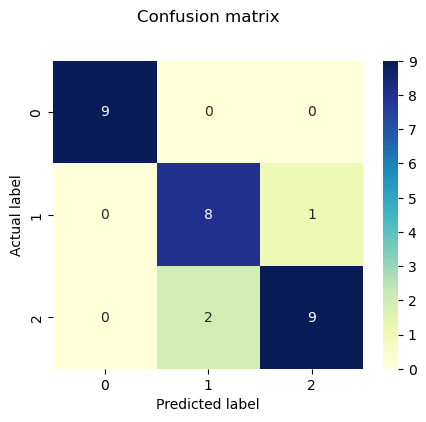

In [104]:
#Confusion matrix
cnf_matrix =confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [106]:
print('The accuracy of Decision Tree Classifier is',accuracy_score(y_test,y_pred_dt))
print("Precision :",precision_score(y_test,y_pred_dt,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_dt,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_dt,average = 'weighted'))

The accuracy of Decision Tree Classifier is 0.896551724137931
Precision : 0.9
Recall : 0.896551724137931
F1 Score : 0.8968109929997409


## 5.Random Forest Classifier

In [109]:
#importing the library
from sklearn.ensemble import RandomForestClassifier

#creating an instance
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)

#Fit the model
rf_clf.fit(x_train,y_train)

#Prediction
y_pred_rf=rf_clf.predict(x_test)

### Evaluation of model created

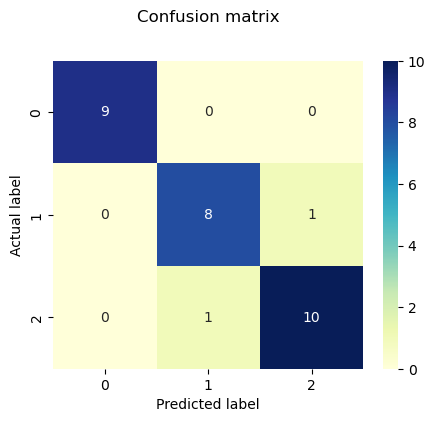

In [110]:
#Confusion matrix
cnf_matrix =confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [111]:
print('The accuracy of Random Forest Classifier is',accuracy_score(y_test,y_pred_rf))
print("Precision :",precision_score(y_test,y_pred_rf,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_rf,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_rf,average = 'weighted'))

The accuracy of Random Forest Classifier is 0.9310344827586207
Precision : 0.9310344827586207
Recall : 0.9310344827586207
F1 Score : 0.9310344827586207


### Comparison of Models created.

In [112]:
print('The accuracy of Logistic regression is',accuracy_score(y_test,y_pred_lr))
print('The accuracy of kNN model is',accuracy_score(y_test,y_pred_knn))
print('The accuracy of Support vector machine classifier  using linear kernal is',accuracy_score(y_test,y_pred_svml))
print('The accuracy of Support vector machine classifier usning rbf kernal  is',accuracy_score(y_test,y_pred_svmr))
print('The accuracy of Decision Tree Classifier is',accuracy_score(y_test,y_pred_dt))
print('The accuracy of Random Forest Classifier is',accuracy_score(y_test,y_pred_rf))


The accuracy of Logistic regression is 0.9310344827586207
The accuracy of kNN model is 0.9310344827586207
The accuracy of Support vector machine classifier  using linear kernal is 0.896551724137931
The accuracy of Support vector machine classifier usning rbf kernal  is 0.8620689655172413
The accuracy of Decision Tree Classifier is 0.896551724137931
The accuracy of Random Forest Classifier is 0.9310344827586207


INFERENCE:Logistic Regression model,Knn model,Random Forest classifier model has high accuracy.SVM models and Decision Tree has less accuracy.

Logistic Regression model,KNN model,Random Forest Classifier model gives the best result because it has high accuracy among others.